<a href="https://colab.research.google.com/github/imtiaz-95/CatvsDog/blob/main/Cats_%26_Dogs_Classification_by_Imtiaz_Sultan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-10-20 19:26:13--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.49.101.59, 2600:141b:e800:148c::317f, 2600:141b:e800:1491::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.49.101.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   107MB/s    in 7.5s    

2022-10-20 19:26:21 (105 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras_preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [46]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/2108.jpg 1


In [47]:
len(input_path)

25002

In [48]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/1719.jpg      0
1  PetImages/Dog/11534.jpg      1
2  PetImages/Cat/12307.jpg      0
3  PetImages/Dog/11384.jpg      1
4   PetImages/Cat/8654.jpg      0

In [49]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [50]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [51]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

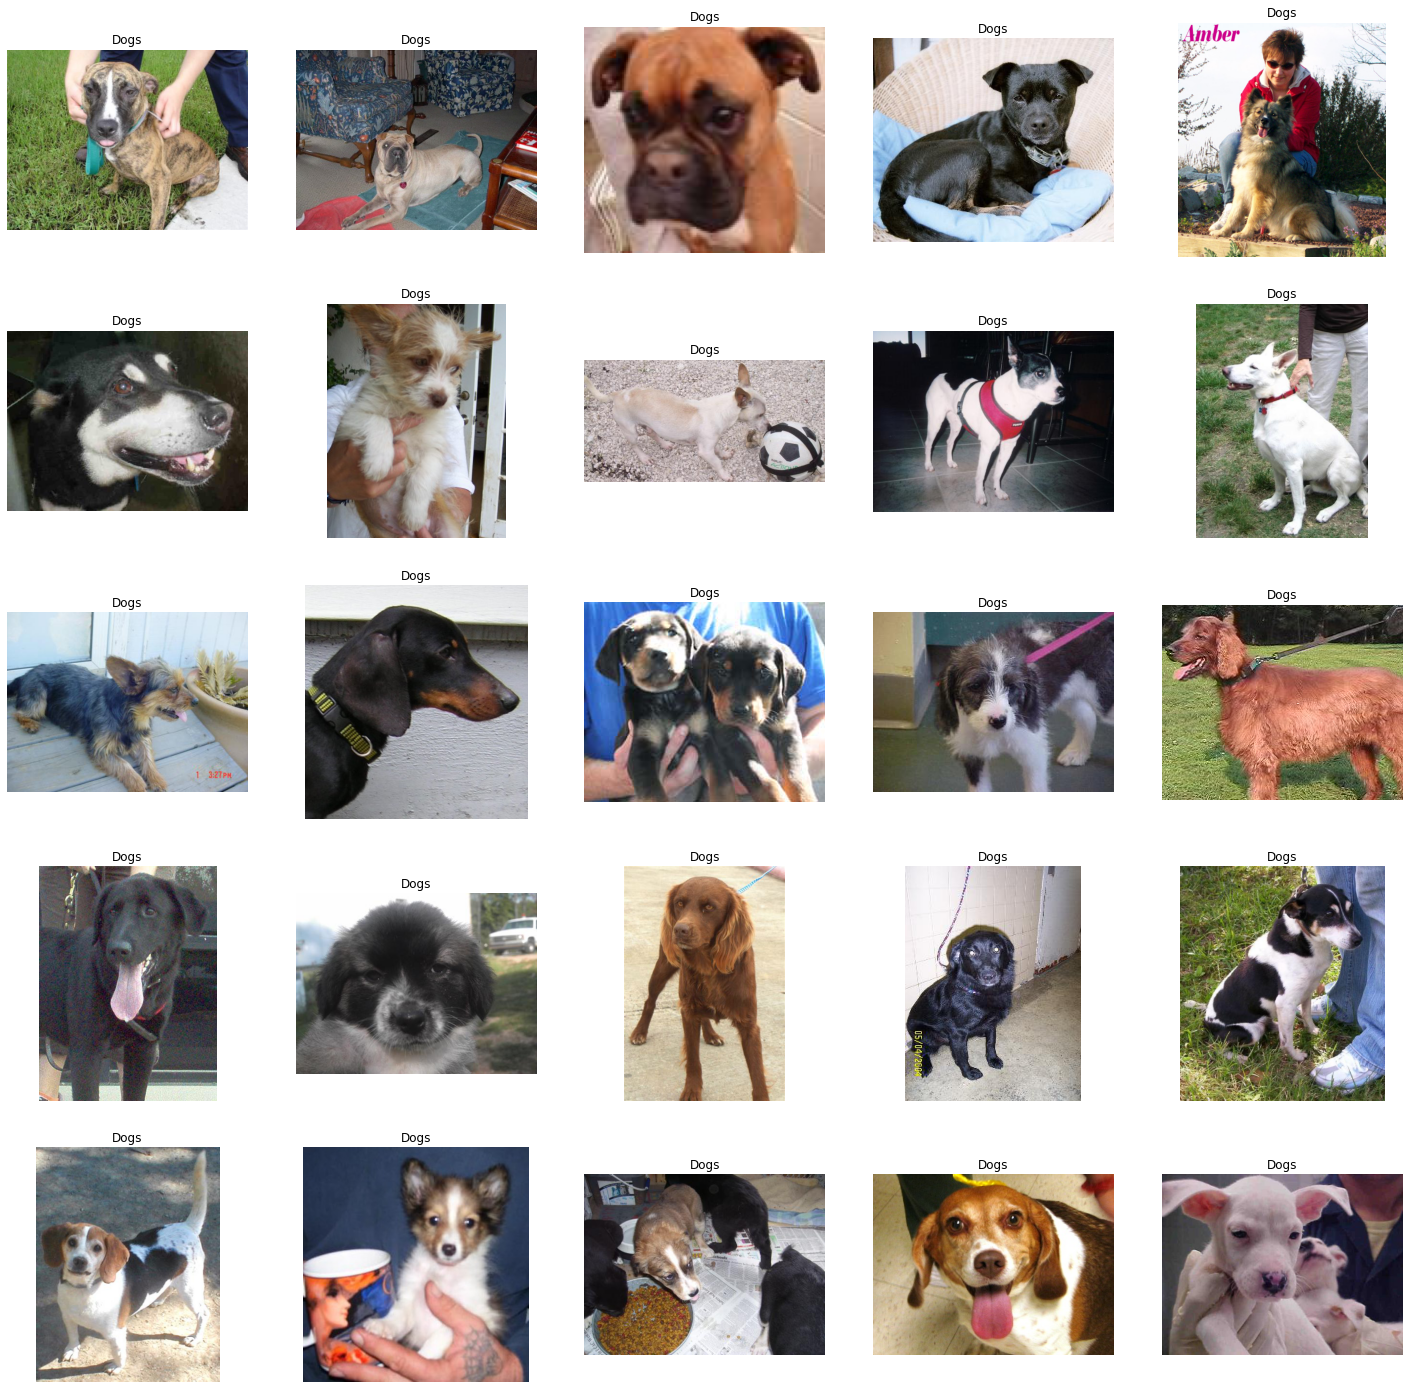

In [52]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

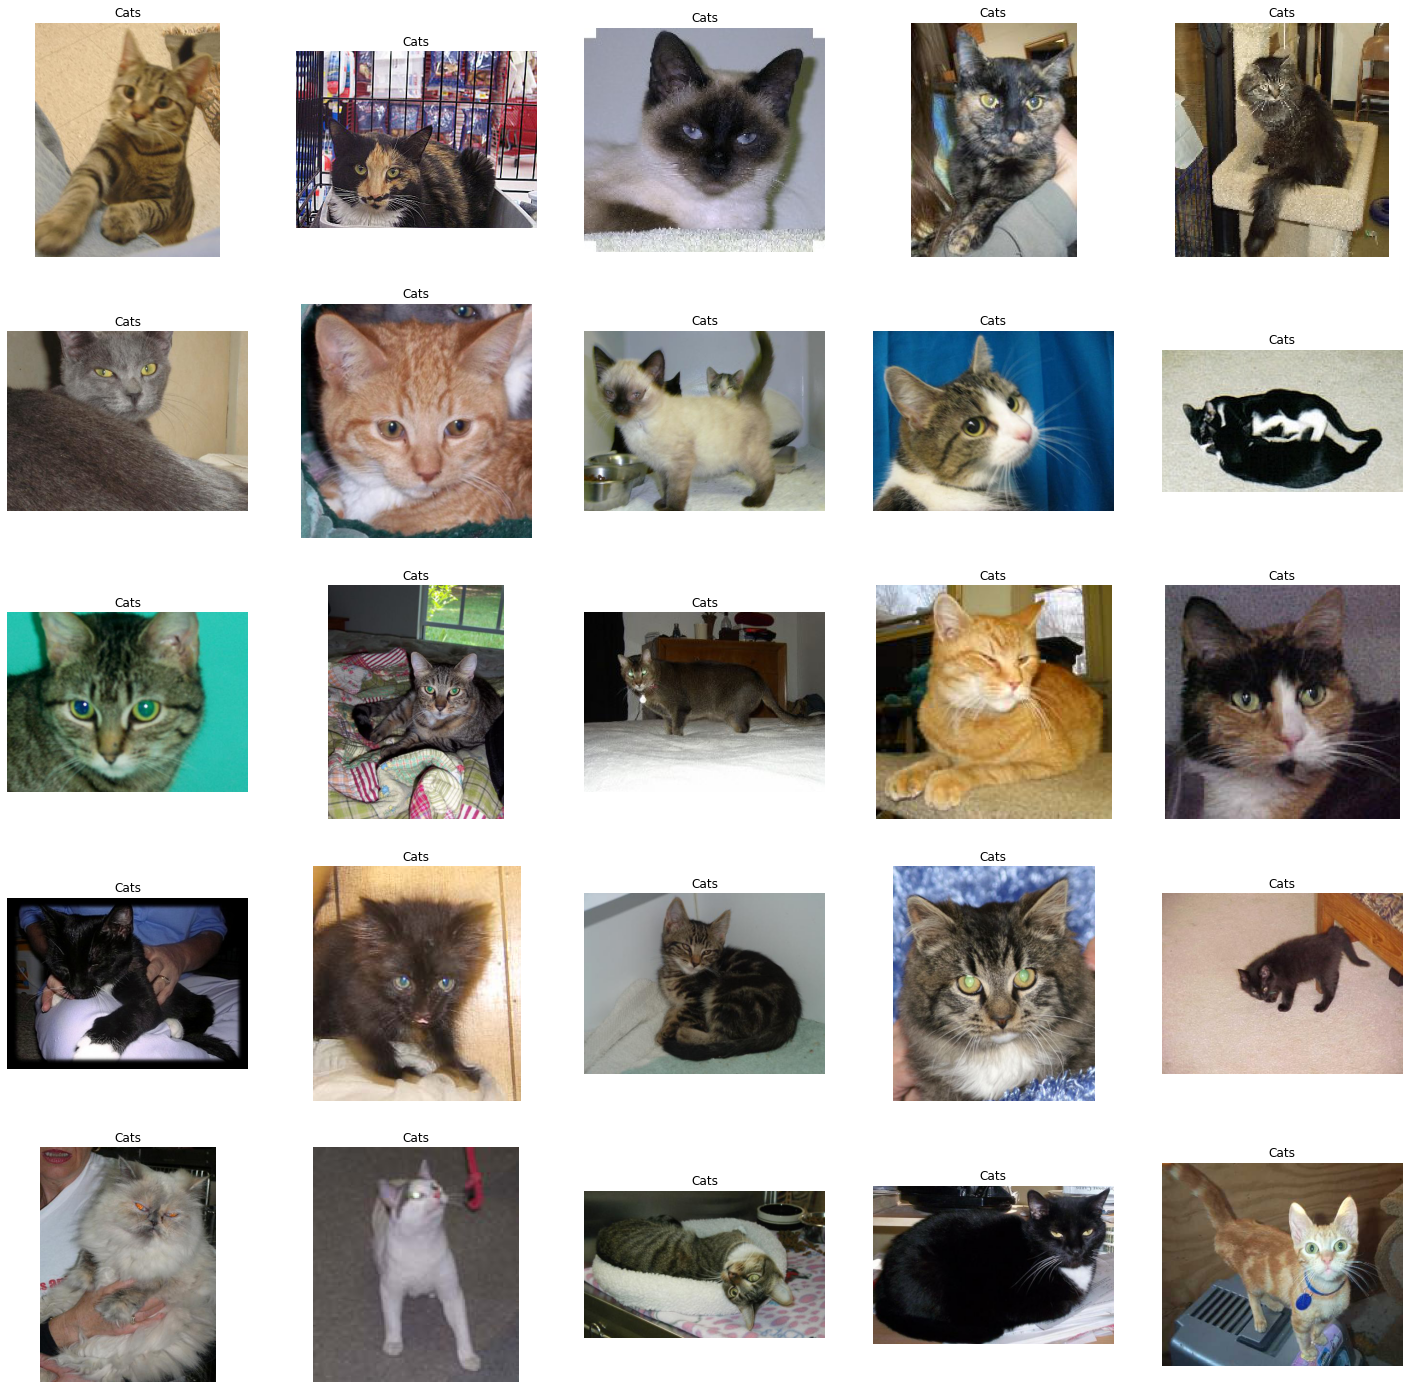

In [53]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

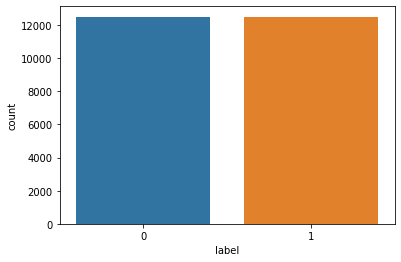

In [54]:
import seaborn as sns
sns.countplot(df['label'])

In [55]:
df['label'] = df['label'].astype('str')

In [56]:
df.head()

images label
0   PetImages/Cat/1719.jpg     0
1  PetImages/Dog/11534.jpg     1
2  PetImages/Cat/12307.jpg     0
3  PetImages/Dog/11384.jpg     1
4   PetImages/Cat/8654.jpg     0

In [57]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [81]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(32, (3,3), activation='tanh', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='tanh'),
                    MaxPool2D((2,2)),
                    Conv2D(128, (3,3), activation='tanh'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='tanh'),
                    Dense(1, activation='sigmoid')
])

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 128)     

In [83]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 126s 3s/step - loss: 1.7157 - accuracy: 0.5602 - val_loss: 0.6128 - val_accuracy: 0.6608
Epoch 2/10
40/40 [==============================] - 124s 3s/step - loss: 0.6132 - accuracy: 0.6618 - val_loss: 0.5828 - val_accuracy: 0.6988
Epoch 3/10
40/40 [==============================] - 125s 3s/step - loss: 0.5882 - accuracy: 0.6884 - val_loss: 0.5729 - val_accuracy: 0.7060
Epoch 4/10
40/40 [==============================] - 123s 3s/step - loss: 0.5715 - accuracy: 0.7054 - val_loss: 0.5410 - val_accuracy: 0.7292
Epoch 5/10
40/40 [==============================] - 124s 3s/step - loss: 0.5552 - accuracy: 0.7155 - val_loss: 0.5329 - val_accuracy: 0.7356
Epoch 6/10
40/40 [==============================] - 123s 3s/step - loss: 0.5408 - accuracy: 0.7281 - val_loss: 0.5331 - val_accuracy: 0.7330
Epoch 7/10
40/40 [==============================] - 123s 3s/step - loss: 0.5434 - accuracy: 0.7269 - val_loss: 0.5251 - val_accuracy: 0.7332
Epoch 8/10
40

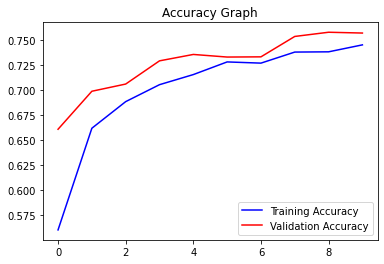

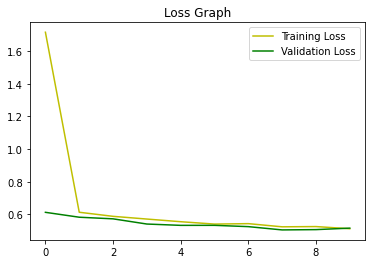

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()